In [109]:
import CapsNet
import numpy as np
from torchvision.transforms import ToPILImage
import os
import matplotlib.pyplot as plt

In [110]:
os.listdir()

['.git',
 '.gitattributes',
 '.gitignore',
 '.idea',
 '.ipynb_checkpoints',
 'Baseline_CNN_Model.py',
 'CapsNet.py',
 'data',
 'HB_Capsnet_R_trained_model',
 'HB_Capsnet_trained_model',
 'HB_Colored_Capsnet_R_trained_model',
 'HB_Colored_Capsnet_trained_model',
 'Images',
 'Logs',
 'README.md',
 'Trained_Models',
 'utils.py',
 'Visualization.ipynb',
 '__pycache__']

In [124]:
model = CapsNet.CapsNet.load_from_checkpoint('./HB_Colored_Capsnet_R_trained_model/checkpoints/_ckpt_epoch_32.ckpt')

Dataset: HB_Colored
Training Examples:  16,384
Validation Examples:  2,048


In [125]:
val_dataloader = model.val_dataloader()[0]

In [126]:
val_dataloader.dataset.classes

['boat', 'house', 'rectangle', 'triangle']

In [127]:
x, y = next(iter(val_dataloader))
x, y = x[:10], y[:10]

In [128]:
images = [ToPILImage()(img) for img in x]
labels = [val_dataloader.dataset.classes[label] for label in y]

In [129]:
output = model(x, y)

In [130]:
predictions = output['predictions']
reconstructions = output['reconstructions']
reconstructions = reconstructions.view(x.shape)

In [131]:
recon_images = [ToPILImage()(recon) for recon in reconstructions]

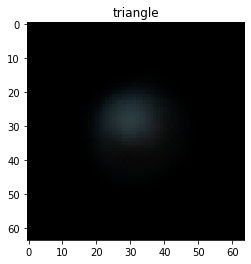

In [138]:
i=1
# plt.imshow(images[i])
plt.imshow(recon_images[i])
plt.title(str(labels[i]))
plt.show()

In [133]:
class_caps = output['class_caps']

In [134]:
class_caps[0]

tensor([[ 1.4572e-02, -9.6330e-03, -2.2168e-02, -3.6094e-02,  1.8007e-02,
          1.5506e-02, -3.9893e-03, -6.8560e-03,  1.9506e-04,  6.9383e-03,
         -1.6013e-02, -9.4074e-03, -2.8562e-02,  5.0310e-02,  1.8067e-02,
         -3.0348e-04],
        [ 2.0833e-01,  3.6877e-01, -1.1849e-01,  2.6815e-01, -1.7221e-01,
         -3.0348e-01, -1.9057e-02,  1.4403e-01,  2.7490e-01, -2.9794e-01,
          2.1297e-02, -2.3902e-01, -2.0207e-02,  1.4107e-01, -3.8044e-01,
         -2.2289e-01],
        [-3.6285e-04,  1.7643e-02,  1.2123e-02,  1.2673e-03,  1.4854e-02,
          1.6846e-02, -5.2621e-03, -7.4441e-05,  1.6353e-02, -5.0152e-04,
          1.3469e-02,  5.2659e-03,  3.7179e-03, -1.3155e-02, -2.0190e-03,
          3.7363e-03],
        [ 9.8336e-03, -3.9610e-02, -1.0120e-03,  2.5636e-02, -1.0615e-02,
          2.2143e-02,  3.3469e-02,  1.5241e-02, -5.6018e-03, -2.3861e-02,
          1.7739e-02,  1.7119e-02, -5.4141e-03, -5.9639e-03,  1.9896e-02,
          8.8323e-03]], grad_fn=<SelectBack

In [135]:
class_probs = output['class_probs']

In [137]:
class_probs

tensor([[0.0824, 0.9192, 0.0409, 0.0776],
        [0.1130, 0.1589, 0.0920, 0.9211],
        [0.1115, 0.8878, 0.1268, 0.0793],
        [0.1935, 0.8647, 0.1415, 0.0689],
        [0.1067, 0.0757, 0.8486, 0.0730],
        [0.0497, 0.8779, 0.0797, 0.0256],
        [0.9220, 0.1250, 0.0508, 0.0757],
        [0.0483, 0.0907, 0.5095, 0.7533],
        [0.2005, 0.1792, 0.1112, 0.8920],
        [0.2008, 0.1229, 0.0350, 0.8788]], grad_fn=<SqrtBackward>)

In [108]:
val_dataloader.dataset.classes

['boat', 'house', 'rectangle', 'triangle']